<a href="https://colab.research.google.com/github/chirag912/first-project/blob/main/SAMARTH_Decision_Tree_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [111]:
df = pd.read_csv ('/content/Hotel Reservations.csv')

In [112]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [113]:
df.shape

(36275, 19)

In [114]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

In [115]:
label_encoder = preprocessing.LabelEncoder()
df['type_of_meal_plan'] = label_encoder.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = label_encoder.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = label_encoder.fit_transform(df['market_segment_type'])
df['booking_status'] = label_encoder.fit_transform(df['booking_status'])
df['Booking_ID'] = label_encoder.fit_transform(df['Booking_ID'])

In [116]:
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [117]:
df['Booking_ID'].value_counts()

0        1
24186    1
24180    1
24181    1
24182    1
        ..
12085    1
12084    1
12083    1
12082    1
36274    1
Name: Booking_ID, Length: 36275, dtype: int64

In [118]:
df['type_of_meal_plan'].value_counts()

0    27835
3     5130
1     3305
2        5
Name: type_of_meal_plan, dtype: int64

In [119]:
df['room_type_reserved'].value_counts()

0    28130
3     6057
5      966
1      692
4      265
6      158
2        7
Name: room_type_reserved, dtype: int64

In [120]:
df['market_segment_type'].value_counts()

4    23214
3    10528
2     2017
1      391
0      125
Name: market_segment_type, dtype: int64

In [121]:
df.iloc[:, 0:19]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


In [122]:
x = df.iloc[:, 0:-1]
y = df.iloc[:,18]

In [123]:
x

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1
36271,36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2
36272,36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2
36273,36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0


In [124]:
y

0        1
1        1
2        0
3        0
4        0
        ..
36270    1
36271    0
36272    1
36273    0
36274    1
Name: booking_status, Length: 36275, dtype: int64

In [125]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=50)

In [126]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((25392, 18), (10883, 18), (25392,), (10883,))

In [127]:
x_test

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
28365,28365,2,0,1,2,0,0,1,17,2018,1,1,4,0,0,0,96.08,1
27360,27360,2,0,0,3,0,0,0,213,2018,6,7,3,0,0,0,130.00,0
33935,33935,2,0,2,3,0,0,0,125,2017,10,15,4,0,0,0,89.25,1
28926,28926,2,0,2,2,0,0,0,35,2018,12,2,4,0,0,0,88.40,1
3325,3325,2,1,0,2,0,0,0,138,2018,7,14,4,0,0,0,130.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25797,25797,2,0,0,4,3,0,0,37,2018,3,1,4,0,0,0,73.10,2
11250,11250,1,0,0,3,0,0,0,151,2018,1,19,3,0,0,0,71.00,0
18480,18480,2,0,1,0,0,0,3,0,2018,1,3,4,0,0,0,99.00,0
26910,26910,3,0,0,3,0,0,3,156,2018,10,6,4,0,0,0,151.20,0


In [128]:
y_test

28365    1
27360    0
33935    1
28926    1
3325     1
        ..
25797    1
11250    1
18480    1
26910    0
10295    0
Name: booking_status, Length: 10883, dtype: int64

In [129]:
model =  DecisionTreeClassifier(criterion='entropy',max_depth =10)

In [130]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

[Text(0.6324344758064516, 0.9545454545454546, 'x[8] <= 151.5\nentropy = 0.912\nsamples = 25392\nvalue = [8300, 17092]'),
 Text(0.35408266129032256, 0.8636363636363636, 'x[17] <= 0.5\nentropy = 0.775\nsamples = 20391\nvalue = [4651, 15740]'),
 Text(0.16360047043010753, 0.7727272727272727, 'x[12] <= 3.5\nentropy = 0.914\nsamples = 10593\nvalue = [3488, 7105]'),
 Text(0.08299731182795698, 0.6818181818181818, 'x[8] <= 74.5\nentropy = 0.589\nsamples = 5397\nvalue = [766, 4631]'),
 Text(0.059475806451612906, 0.5909090909090909, 'x[16] <= 201.5\nentropy = 0.396\nsamples = 3828\nvalue = [300, 3528]'),
 Text(0.043682795698924734, 0.5, 'x[3] <= 0.5\nentropy = 0.378\nsamples = 3806\nvalue = [279, 3527]'),
 Text(0.020161290322580645, 0.4090909090909091, 'x[12] <= 2.5\nentropy = 0.221\nsamples = 2287\nvalue = [81, 2206]'),
 Text(0.01747311827956989, 0.3181818181818182, 'x[13] <= 0.5\nentropy = 0.493\nsamples = 753\nvalue = [81, 672]'),
 Text(0.010752688172043012, 0.22727272727272727, 'x[16] <= 87.2

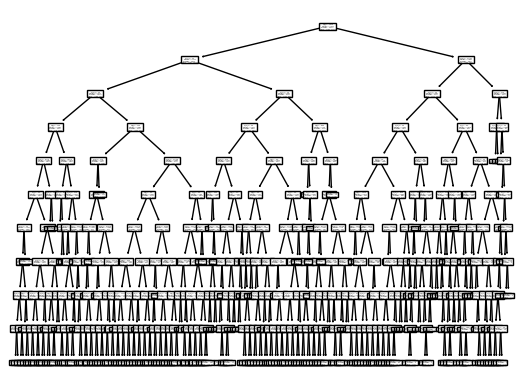

In [131]:
tree.plot_tree(model)

In [132]:
fn = ['Booking_ID','no_of_adults',	'no_of_children',	'no_of_weekend_nights',	'no_of_week_nights',	'type_of_meal_plan',	'required_car_parking_space',	'room_type_reserved',	'lead_time', 'arrival_year',	'arrival_month',	'arrival_date',	'market_segment_type',	'repeated_guest',	'no_of_previous_cancellations',	'no_of_previous_bookings_not_canceled',	'avg_price_per_room',	'no_of_special_requests']
cn = ['Canceled', 'Not_Canceled']


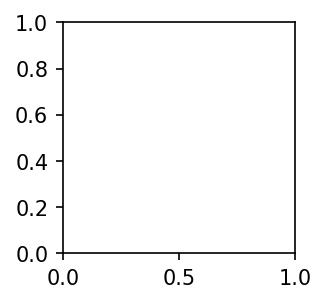

In [133]:
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(2,2), dpi=150)


[Text(0.6324344758064516, 0.9545454545454546, 'lead_time <= 151.5\nentropy = 0.912\nsamples = 25392\nvalue = [8300, 17092]\nclass = Not_Canceled'),
 Text(0.35408266129032256, 0.8636363636363636, 'no_of_special_requests <= 0.5\nentropy = 0.775\nsamples = 20391\nvalue = [4651, 15740]\nclass = Not_Canceled'),
 Text(0.16360047043010753, 0.7727272727272727, 'market_segment_type <= 3.5\nentropy = 0.914\nsamples = 10593\nvalue = [3488, 7105]\nclass = Not_Canceled'),
 Text(0.08299731182795698, 0.6818181818181818, 'lead_time <= 74.5\nentropy = 0.589\nsamples = 5397\nvalue = [766, 4631]\nclass = Not_Canceled'),
 Text(0.059475806451612906, 0.5909090909090909, 'avg_price_per_room <= 201.5\nentropy = 0.396\nsamples = 3828\nvalue = [300, 3528]\nclass = Not_Canceled'),
 Text(0.043682795698924734, 0.5, 'no_of_weekend_nights <= 0.5\nentropy = 0.378\nsamples = 3806\nvalue = [279, 3527]\nclass = Not_Canceled'),
 Text(0.020161290322580645, 0.4090909090909091, 'market_segment_type <= 2.5\nentropy = 0.221\n

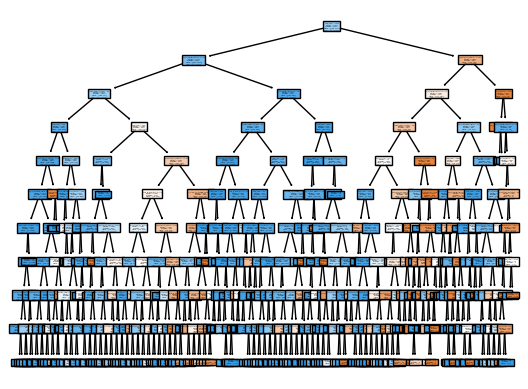

In [134]:
tree.plot_tree(model,feature_names=fn,class_names = cn, filled=True)

In [135]:
preds = model.predict(x_test)

In [136]:
preds

array([1, 0, 1, ..., 1, 0, 0])

In [137]:
pd.Series(preds).value_counts

<bound method IndexOpsMixin.value_counts of 0        1
1        0
2        1
3        1
4        1
        ..
10878    1
10879    1
10880    1
10881    0
10882    0
Length: 10883, dtype: int64>

In [138]:
preds


array([1, 0, 1, ..., 1, 0, 0])

In [139]:
y_test

28365    1
27360    0
33935    1
28926    1
3325     1
        ..
25797    1
11250    1
18480    1
26910    0
10295    0
Name: booking_status, Length: 10883, dtype: int64

In [140]:
pd.crosstab(y_test,preds)


col_0,0,1
booking_status,,
0,2669,916
1,602,6696


In [141]:
np.mean(preds==y_test)

0.8605164017274649

In [142]:
x_test['preds']=preds

In [143]:
x_test['y_test']=y_test

In [144]:
x_test

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,preds,y_test
28365,28365,2,0,1,2,0,0,1,17,2018,1,1,4,0,0,0,96.08,1,1,1
27360,27360,2,0,0,3,0,0,0,213,2018,6,7,3,0,0,0,130.00,0,0,0
33935,33935,2,0,2,3,0,0,0,125,2017,10,15,4,0,0,0,89.25,1,1,1
28926,28926,2,0,2,2,0,0,0,35,2018,12,2,4,0,0,0,88.40,1,1,1
3325,3325,2,1,0,2,0,0,0,138,2018,7,14,4,0,0,0,130.50,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25797,25797,2,0,0,4,3,0,0,37,2018,3,1,4,0,0,0,73.10,2,1,1
11250,11250,1,0,0,3,0,0,0,151,2018,1,19,3,0,0,0,71.00,0,1,1
18480,18480,2,0,1,0,0,0,3,0,2018,1,3,4,0,0,0,99.00,0,1,1
26910,26910,3,0,0,3,0,0,3,156,2018,10,6,4,0,0,0,151.20,0,0,0
